<a href="https://colab.research.google.com/github/Dexne/Artificial_Intelligence_Seminar/blob/main/06_M%C3%A9tricas_de_clasificaci%C3%B3n/Clasificaci%C3%B3n_de_digitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Métricas para clasificación
# Clasificación de digitos
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Leer datos:

In [6]:
digits = datasets.load_digits()
target, images = digits['target'], digits['images']
images.shape

(1797, 8, 8)

Calcular cuántos hay

In [3]:
n_samples = digits['target'].shape[0]

Mostrar una imagen de manera aleatoria

Text(0.5, 1.0, 'Target: 6')

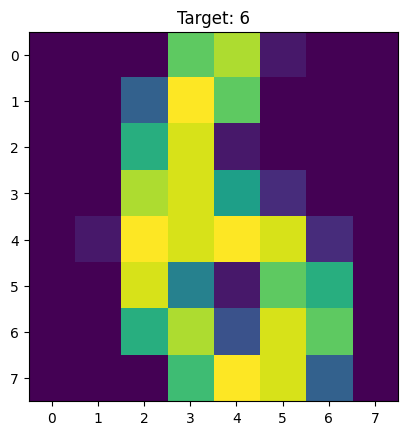

In [4]:
sample = np.random.randint(n_samples)
plt.imshow(images[sample])
plt.title('Target: %i' % target[sample])

In [7]:
# Aplanar las imagenes
x = images.reshape((n_samples,-1))
x.shape

(1797, 64)

In [9]:
# separar conjuntos de entrenamiento y prueba
xtrain, xtest, ytrain, ytest = train_test_split(x, target)

In [10]:
#Instanciar modelo
model = svm.SVC(gamma=0.0001)

In [11]:
# Entrenar modelo
model.fit(xtrain, ytrain)

SVC(gamma=0.0001)

In [12]:
# Aplicar metrica al modelo
print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

Train:  0.9769858945805494
Test:  0.9688888888888889


In [13]:
# Hacer predicciones del test
ypred = model.predict(xtest)

In [16]:
# Reporte de clasificación
print('Classification report: \n', metrics.classification_report(ytest, ypred))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        46
           2       1.00      1.00      1.00        40
           3       1.00      0.90      0.95        39
           4       0.98      0.95      0.96        42
           5       1.00      0.97      0.98        60
           6       0.96      1.00      0.98        47
           7       0.93      0.98      0.96        44
           8       0.88      0.97      0.93        39
           9       0.95      0.93      0.94        43

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [17]:
# Matrix de confusión
print('Confusion matrix: \n', metrics.confusion_matrix(ytest, ypred))

Confusion matrix: 
 [[49  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  1  3  0]
 [ 0  0  0  0 40  0  0  1  1  0]
 [ 0  0  0  0  0 58  1  0  0  1]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 43  0  1]
 [ 0  0  0  0  0  0  1  0 38  0]
 [ 0  1  0  0  0  0  0  1  1 40]]


La matriz de confusión nos ayuda a ver en qué nos estamos equivocando

Text(0.5, 1.0, 'Prediction: 5')

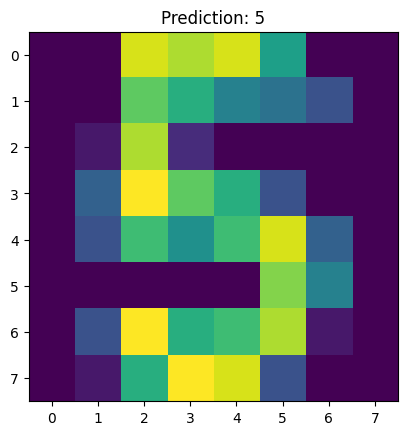

In [18]:
# Dibujar una predicciíon aleatoria
sample = np.random.randint(xtest.shape[0])
plt.imshow(xtest[sample].reshape((8,8)))
plt.title('Prediction: %i' % ypred[sample])